# WELCOME TO ATTEMPT **3** of **"*THE MOST AUTISTIC THING I HAVE DONE, LIKE, EVER*"**

This is mostly attempt 2 again, **note to self, backups are not optional**.
The whole attempt 2/3 is due to v1's failings, but a bit of a recap first.

## Recap
This whole endevour is to check definitely how much time has passed in the webserial *"Wearing Power Armor to a Magic School"* written by **JCB112** (or `WPatMS` for short), the other goal is to predict in which chapter a *"communication deadline"* which happens 5 weeks after the beginning of the book.

Thanks to a **TON** of manual analysis we know that the book can't start any earier than 15:30 on the first day

## V1 Sucesses
As much as V1 was flawed from the start it did a bit of good:
1. **THE GRAPHS**, v1 gave us some very good graphs, even though they were a bit wonky in places *(the X-axis)*
2. It helped greately with the manual analysis
3. It proved that this way of parsing the timestamps can work

## V1 Problems
This is a bit easier than the above section:
1. The creation of html files and only then parsing them is a stupid idea. It would have some merit, if any changes would be made for these files, but such a thing was just not done
2. The jupyter notebook changed some variables in a cell, which did not have the definition, this made the code require a full restart on every run, as running it twice changed some variables
3. The code was not portable, the creation of the html files and the folders, required the use of some linux only commands, i want to change that by ... just not having any files saved
4. **THE GRAPHS™** all have a wonky x-axes, this is due to x being "event index" and not "chapter". This was easier, but it makes everything harder to understand

## V2 Failings
Ok this will be short. ***BACKUPS***.

So I opened a vscode server, connect to it from school (this is after *4 fucking days of coding*) **AND IT FUCKING DELETES THE WHOLE FUCKING FILE**

As to the fix, this is a git repo.

The second main failing was keeping the use of timestamps, and not just "minutes after midnight".

## V3 - Functional description

1. Parse the epub (it will be XHTML), as a list called `book` containing `chapters` that are a list of lines
2. Search for timestamps
3. Convert the timestamps to "minutes after midnight
4. Do some graphs
5. Find the amount of days that passed
6. Find the chapter, where the deadline passes

# Install of the required libraries
This code uses 2 libraries, namely [EbookLib](https://pypi.org/project/EbookLib/) and [matPlotLib](https://matplotlib.org/)

In [18]:
%%capture
# the %%capture thing makes the output supressed, on first run you might want to comment that out

# install the used libraries, thank god for FOSS
%pip install EbookLib
%pip install matplotlib

In [19]:
redditChapterText = """
 The two parade floats showed no signs of stopping.

A fact quickly corroborated by the EVI.

[Warning! Collision imminent!]

So, without hesitation, I made my moves.

With one arm picking up the diminutive ferret — his whole body elongating like a slinky in the process — and the other arm poised to deploy the much-dreaded grappling hook, aimed just above Auris’ float.

[Grappler trajectory confirmed! Proceed?]

However, no sooner were those calculations made, did the figureheads of both floats suddenly come to their senses, ordering their respective hallway-sized ego-machines to an abrupt halt.

Though, it would quickly become clear that this wasn’t done for the sake of the pedestrian.

Instead, the two parties seemed to be first and foremost preoccupied amongst themselves.

“Does Lord Auris Ping of Pronarthiarealm, fellow peer of the Transgracian Academy for the Magical Arts, yield to the Class Sovereign candidate, Lord Qiv’Ratom?!” The hamster-like Rostario shrieked bombastically, earning nothing but an annoyed grunt from the bull.

“No, I do not yield!” Ping shouted back, prompting Ladona to push forward with what I assumed to be a rebuttal.

“Does Lord Qiv’Ratom of Baralonrealm, fellow peer of the Transgracian Academy for the Magical Arts, yield to the Class Sovereign candidate, Lord Auris Ping?!” Ladona shot back.

“No, I do not yield.” Qiv declared with a surprising degree of class compared to his bullish counterpart.

All of this culminated in both would-be candidates shifting their attentions down from their thrones, towards both me and the ferret merchant lord.

“Do, you, Cadet Emma Booker of Earthrealm, fellow peer of the Transgracian—”

“—Academy for the Magical arts, yadda, yadda, yadda…” I interrupted, letting my annoyance be known. “First of all, let’s take a step back. What’s all of this actually about?” I gestured frantically towards either float, decorated to the brim with mana-enriched metals glistening with not just random specks of light, but outright patterns that ranged from flowers to intricate engravings, to even the signatures of either ‘candidate’.

That question, whilst received with a series of nods from Qiv’s group, seemed to be enough to give Ping the ‘ammunition’ he needed to strike back.

“HAH! The newrealmer once more shows her true colors, as one so lacking in the deeper nuances of the dynamics of power beyond mere feats of physical strength.” He taunted, eliciting an uproarious series of laughs from his float-members and followers, prompting me to tap my feet in response.

“You must have quite the selective memory, Lord Ping, because if I recall correctly… you of all people had first-hand experience with a certain library card belonging to yours truly.” I stated bluntly, my hand tapping the pouch housing the aforementioned card. “I assume that the library doesn’t just hand out these things for ‘mere feats of physical strength’, now does it?”

The bull’s eyes grew wide at that retort, Ladona’s spindly hands seemingly the only thing keeping him from violently leaping out at me, as she gently massaged his shoulders in an attempt to calm him down.

Qiv’Ratom, however, cleared his throat to call for our attention. “Please be reasonable, Lord Ping. It’s simply unreasonable to assume she — a newrealmer with the barest grasp of our civil practices — has an answer to every question, so let’s try to enlighten her in a civilized manner, yes?”

The bull refused to respond, simply shrugging as Qiv momentarily took the reins of the conversation. “What you see before you are floats, newrealmer. They are part of a long-standing tradition; the procession for one’s ‘declaration to campaign’ for the position of Class Sovereign.”

“Right.” I nodded in acknowledgement. “So… I’m guessing the class sovereign is like, the de-facto leader or representative of the year group or something?”

“Correct, newrealmer.” Qiv responded tactfully. “It is a position which only one may hold, for the duration of the entirety of the year group’s enrollment within the Academy.”

Cogs started turning in my head at that revelation, as it quickly became clear how Class Sovereign probably wasn’t a clean one-to-one analog of Class President, but was once again probably yet another twisted mirror-version of the institutions back home.

So even the humble Class President isn’t safe from Nexian-ification, huh?

“I’m assuming that there’s no voting involved then, is there?” I responded with a sigh, garnering a nod from Qiv, and an indignant huff from Ping.

“Define… voting, newrealmer.” The bull replied with a dismissive chuckle.

“Oh come on… I know you guys at least have some concept of it.” I began with an exasperated sigh. “Voting… the process of choosing officials in positions of power, or policies, by declaring or casting your preference for said official or policy.”

“And exactly why would we ever put such a time-honored and storied position to the whims of the esoteric inclinations of the ravenous masses?” Ping responded with an indignant huff. “Yes, the concept of voting is not beyond us. But the act of voting, of casting your decision, is one which must be made amongst equals of heritage, pedigree, and titles. From the peerage council of class sovereigns, to the privy council in His Eternal Majesty’s court, the act of voting is sacrosanct, and must be reserved for those deserving of it. And even then, council decisions, no matter how unanimous, must ultimately always be subject to the will of the highest sovereign by decree or birthright.”

“The Dean is to the Class Sovereigns, what His Eternal Majesty is to the Privy Council — the ultimate voice amidst what are effectively extensions of his own power.” Qiv concluded, garnering what was perhaps one of the few nods of acknowledgement from Ping.

“Right, so, if not voting… how exactly is the Class Sovereign chosen?”

“By Dean’s decree, of course.” Ping responded with a self-satisfied smile. “Haven’t you been listening, newrealmer?”

“If we’re being pedantic about it, that would be the answer.” I replied with an annoyed grunt. “But I meant the actual process, Lord Ping.”

“The prerequisite to even entering the challenge is to be a member of the top seven peer groups by points.” Qiv answered. “Following which, a test of strength, a test of knowledge, and a test of magical prowess will be required.”

“These tests differ from year to year, but it is the final test, the Quest for the Sword, which remains relatively similar year after year.” Auris continued, jockeying the mantle of answering from Qiv. “While the specifics change, the premise remains bound to the original myth surrounding the Academy’s founding, a tale of a wizened monarch being chosen by the enlightened waterfolk of Lake Telliad; a test conducted by His Eternal Majesty’s far-reaching sight and will. This monarch who was drawn to a vision of this artifact, suffered hardship after hardship before being bestowed this marker of leadership at the hands of this venerable waterfolk — an artifact which he would later wield to aid His Eternal Majesty in his ultimate quest to establish Status Eternia.”

That rising tone of voice, coupled with his increasingly manic gesticulations, worried me greatly.

But it wasn’t out of fear of action or violence.

No.

It was fear of being trapped in another unskippable dialogue screen.

And whilst I hated to admit that we had anything in common, it took one blabbermouth to understand when another blabbermouth was about to go all in on a particular subject of their fixation.

This was one of those moments.

“Riiight.” I nodded warily. “Thanks for bringing me up to speed on this whole… campaign you’ve got going on. But if you don’t mind, I do have places to be, people to see, and sooooo I think I’ll be leaving now.” I offered, before making a point to crane my head toward both directions. “Erm, I don’t suppose one of you guys could like… back up or something?”

“Backing up, would be akin to yielding, newrealmer.” Auris responded indignantly, prompting me to let out a sigh, before taking a few purposeful steps back.

“Fine, I’ll just make my own way out. Gosh… why do you always insist on making everything so fricking complicated…” I responded through a half-mumble, turning to the EVI with a single, simple order.

“EVI, sports mode. Leapfrog.”

[...]

“EVI, leapfrog.”

[...]

“Acknowledged. Activating sports mode, custom preset: LEAPFROG.”

With a sudden limberness felt throughout my body, and feeling as if I’d suddenly been imbued with some temporary DEX increase spell, I knelt down at the EVI’s virtual starting line; my eyes continuously trained on both the highlighted ‘track’ in front of me and Auris’ bewildered expression.

“Go.”

I sprinted forwards without warning, making a mad dash seemingly right towards Auris’ float, before at the very last minute, leaping over it in a single, pointed, jump.

The quadruple-volume ceilings the Academy was so fond of using finally proved to be practical this time around, as it gave me more than ample airspace to make the leap up and over Auris’ wedding-cake of a campaign float.

I couldn’t help but to let out a wide grin as all eyes were once more on me and my little stunt, and as Auris’ zealous fervor wavered into momentary dread upon seeing me outright lunging towards him, only to miss him by just a few inches.

“Good luck on the whole class sovereign thing, guys!” I shouted back for good measure, giving the bewildered crowd a solid wave.

“This isn’t over, newrealmer!” I could hear Ladona screeching in Auris’ fear-stricken place, as I went about my merry way down the corner… with Etholin still in tow.

…

The poor thing was practically shaking now, even as I set him down as soon as we were out of earshot. “Sorry about that little stunt, Etholin.” I offered with a nervous chuckle, reaching for the back of my neck in the process.

“I-it… it is… quite alright, Cadet Emma Booker.” He offered meekly, and through a nervous chattering of his teeth. “That… was… quite the feat of… strength.”

“Heh, it’s nothing really.” I responded awkwardly. “Let’s just continue where we left off, shall we?”

The ferret nodded, once more leading the way as he slowly, but surely, transitioned back to his prior gait and posture.

“So, yeah, I’d be more than happy to help you out with PE and all that. School stuff is the same in every realm, I imagine. It’s a constant fight until graduation, so why not make that fight easier by lessening the burden amongst friends?” I continued, the mingling of my diplomatic and genuine side coming through just like it did with the gang.

“I-indeed, Cadet Emma Booker.” Etholin nodded. “I’d like that, very much. A-and as stated previously, this request is not a blanket declaration. The terms of our… mutual aid, can very much be enacted as per a case-by-case basis.”

“So not a wholesale mutual-defense pact, but more so a friendly memorandum of understanding on the subject of mutual cooperation, subject to whatever the issue is on hand.” I clarified.

“Y-yes, in a manner of speaking.” Etholin acknowledged, his brow perking upwards with interest. “Considering this is the start of our working relationship, I believe it is prudent to set boundaries, so as to help establish the limits of our respective investments in either party.” The ferret took a moment to pause, before correcting himself promptly. “I do apologize i-if that is a bit too forward, Cadet Emma Booker. I will understand if you take offense to the cold and callous nature of—”

“It’s alright, Etholin.” I attempted to reassure him. “If anything, I appreciate the upfrontness. It’s not just good business, but also solid diplomacy-building; not mincing your words behind empty platitudes and such.”

The ferret nodded in understanding, a confidence which burned bright in his eyes, giving me a surge of confidence in this whole diplomatic endeavor, as the first seeds of relations beyond the confines of my peer group seemed to have just been planted.

However, just before we arrived at the intersection of dynamically-moving stairs, another thought quickly entered my head. As I realized I needed to broach this now, before we parted ways.

“Hey Etholin, there’s actually something I’ve been meaning to ask you since the commoner’s district.” I began, garnering a cock of the ferret’s head.

“Oh?”

“Well, first off, I was going to ask you exactly how and why you’re able to speak ‘commoner Nexian’ dialects… but I think your involvement in trade and commerce sorta makes that point self-explanatory.”

Etholin nodded in acknowledgement at that, before gesturing for me to continue.

“Right, so. Onto my main point then. I don’t imagine many students have much of a reason to leave the ambassadorial district, so I’m curious as to what exactly you were doing out there?” I asked plainly.

“Ah! A very astute observation, Cadet Emma Booker!” Etholin perked up. “I was merely doing my rounds, visiting those under my patronage and sponsorship, as is tradition for Rontalisrealm merchant noblemen upon arrival at any foreign port! Such things are typically reserved for my bannermen, but given the exclusivity of Nexian visitation, it is typically expected for the issuer of charters and licenses themselves to make personal visits to their wards.”

“Huh.” I acknowledged with a nod. “So, from what I’m understanding, are you saying that the guy’s ability to conduct business is entirely dependent on your official sponsorship? Like, as a license issuer or something?”

“That is correct.” Etholin nodded. “Commoners, unless under some form of a generational charter, must first acquire licenses or sponsorships from noble houses in order to conduct business or practice a certain trade. Whilst the details of this vary, my family has been well known to be very generous with our sponsorships.”

“Hence why you’re known as a merchant Lord?” I clarified, causing the ferret’s ears to dip somewhat. “Sorry if that was offensive or anything, Etholin, I was just—”

“No, no! You… you are well within your rights to ask such questions. You are entirely alien to our ways after all.”

“Again, I apologize if that was at all a faux pas. You don’t need to answer—”

“The answer is, yes, Cadet Emma Booker. There is… something of a taboo when it comes to the generous issuance of licenses and sponsorships to commoners. Generally speaking, there exists an unspoken ratio as to what’s considered acceptable rates of issuance. A ratio which is determined by a variety of factors. The simplest being the ratio between the amount of land the issuing noble house possesses, and the number of sponsorships issued at any given time.”

“I’m imagining your house has a lot of licenses issued then.” I offered.

“In a manner of speaking, yes.” Etholin affirmed, but then quickly clarified. “We are within what is considered the tail-end of the acceptable ratio. However, the issue arises in the diversity of our sponsorships, which most may see as nonexistent. This is because most of our sponsorships trend towards the single-generation issuance of merchant licenses, rather than the patronage of trades such as those of the Artisan charters, Scribes, non-magical Healers, Seafarers, and so on and so forth.”

I couldn’t help but to remain entirely transfixed on this bit of the world’s lore, as opposed to whatever Auris and Qiv were doing.

“This is all so very fascinating, Etholin.” I expressed with genuine delight, garnering a cock of Etholin’s head, and a perplexed expression bordering on confused relief. “There’s definitely a lot to be said about trade houses. In fact, some of the most powerful noble houses in our history were the more trade-focused houses. So I definitely see the wisdom in going down this route.”

The ferret’s eyes widened even further, his lips parting open as if he was taken by complete surprise.

“I… This is… Thank you, Cadet Emma Booker.” The ferret took a moment to dip his head towards me. “Suffice it to say, it is… exceedingly rare to encounter those who consider my house’s practices to be anything but unsavory and undignified.”

“I’m not saying that trade itself is inherently unproblematic and without its own unique brand of issues, mind you. But what I am saying is that giving commoners under your… care, the right to empower themselves like this, is certainly more noble in my book than simply keeping them from their aspirations.”

The ferret nodded deeply once more, as a smile formed across his face. “I will take that as an… unusual compliment then. Thank you.”

There was a genuine sense of giddiness that remained pervasive throughout his voice now, as the undercurrents of skittishness was punctuated by an overall renewed sense of pride. One that seemed otherwise nonexistent whenever he was in the presence of other nobles.

“Don’t mention it. I just say things as I see them, Etholin. Which… given the time, probably means I should be saying goodbye for now.” I responded, segueing into my departure from our little back and forths, as the Rontalisrealmer began walking off… one massive staircase at a time.

=====

The Transgracian Academy for the Magical Arts. Healing Wing. Local Time: 2055 Hours.

Emma

I wasted no time in storming the grand lobby of the healing wing.

But the same could be said for the rejection I received upon arrival.

As a lone, tired-looking hooded elf looked up from the reception desk. Or at least, what I assumed was a reception desk hidden under piles upon piles of books, scrolls, and endless sheets of paperwork.

“I am afraid I cannot divulge the names of either student or faculty currently admitted within the in-patient wards of the healing wing.” The sullen, sleep-deprived looking elf apprentice spoke through a malaise that even I felt sorry for.

“Well, I’m not exactly looking for a student or faculty member per se, she’s an outsider that I’m pretty sure was admitted here by either Professor Chiska or Professor Vanavan.” I attempted to clarify as politely, but insistently, as I could.

However, all I received in response was a tired sigh, as the half-lidded eyes of the elf barely even flinched despite the obvious annoyance I was causing her.

“I am afraid I cannot divulge the names of any student, faculty, or others currently admitted within the in-patient wards of the healing wing.” She reiterated, simply resorting to adding a clause to a canned response that I quickly found out to be a pre-written script beneath one of her many stacks of documents.

“Can I just take a look or something? I promise I’ll be out of your hair quick.”

A pause punctuated that question, as the elf plonked her gloved finger on her pre-written script, before landing on an answer which she read verbatim.

“I am sorry, but outsiders are not allowed inside past visiting hours. Please try again during visiting hours.” She spoke slowly through a yawn, her consciousness threatening to leave her mortal coil.

Looking around, I knew that forcing or even sneaking my way in probably wasn’t the best way of going about this, given the sheer number of gargoyles present.

So I disengaged for now.

Though it was clear I wasn’t the only one to disengage from this battle.

PLONK!

…

My rear view cameras confirmed that the elf in question had finally succumbed to the call of slumber, papers now scattering following her unfortunate face-plant; a golem soon arrived to drop a heavy blanket over her now-lifeless form.

=====

Dragon’s Heart Tower. Level 23. Residence 30. Local Time: 2115 Hours.

Emma

I arrived to find a relatively relaxed atmosphere in the dorm.

With Thacea silently reading a book, downing cups of tea in the process.

Thalmin having had just returned from the gym, his attention now entirely consumed by the small batch of homework I just remembered we were assigned.

And finally, Ilunor, busy doing much of the same.

It was almost a bit of an emotional whiplash to be seeing everyone in full school-mode following the back-to-back adventures.

I could almost forgive myself for forgetting we even had grades to worry about sometimes.

Almost, being the operative word here.

“EVI?”

“Yes, Cadet Booker?”

“Do you think you can do my homework for me?”

[...]

“Please? It’s mission-sensitive.”

“Does the mission operator wish to classify school assignments as [mission sensitive]?”

“Yes. We’re not on Earth, so this doesn’t fall under the VI/AI Academic Misconduct Act okay? Please just dedicate some of your processing power for this; you can allocate the bare minimum if you want to. Just print it out or something when you’re done, I’m sure it’ll be fine.”

[...]

“Acknowledged.”

“Thanks, EVI.” I beamed back, taking a sigh of relief for actually being able to expedite one of the more laborious tasks here.

“Homework, I’m guessing?” I asked the gang, who all nodded, save for Thacea.

“I’ve already completed my assignments. You may take a look if you wish to, Emma.” Thacea offered candidly.

“Nah, it’s fine, I’m finishing mine right now actually.” I beamed out brightly, tapping my helmet in the process, preemptively addressing the questions which were undoubtedly coming my way. “In here, just processing it all as we speak.”

“Right.” Ilunor responded, half-unamused, half-tired from my shenanigans. “I am not even going to dignify that with a response.” He sighed, choosing to disengage… which was probably the best thing he could do tonight.

Getting into the existence of the EVI, was a whole can of worms unto itself.

“Fair enough. In any case, I had a question I wanted to ask you guys about. Several, actually.” I began as I sat down on the couch.

“Go ahead, Emma?” Thacea acknowledged, choosing to sit opposite of me.

“The search for Rila is currently hitting a bit of a roadblock, so I’ve come up with two paths I’d like to run by you.”

…

10 Minutes Later

…

“Correction; you have one path ahead of you, Emma.” Thacea answered definitively, leaving no room for argument or discourse.

“I’m assuming it’s not the idea where we attach Rila’s bracelet to a drone, then having it circle around the medical wing to see if it’d activate?”

“No, Emma.” Thacea doubled-down, in a way that only a stern partner could. With a sigh and a firm grip of her forehead, she quickly continued. “It is your second idea that I am more comfortable with. Though this begs the distressing question as to exactly how and why the more sane idea was your second thought…”

“Heh… I guess I’m just a bit impatient is all.” I responded, awkwardly rubbing the back of my helmet in the process. “I guess we’ll go with the more straightforward option then. We’ll just ask Chiska about the whole Rila thing whenever she’s free, and then push for a visit. It… does seem like the underwhelming way of going about it though…”

“Yes, Emma.” Thacea acknowledged with an exasperated breath. “‘Underwhelming’ often is the best way of going about it. Following which, should the results of this venture prove questionable, we will then discuss the possibility of escalation.”

“Yeah, you’re right. It’s the same idea with just asking for the book from Larial instead of stealing it, I guess.” I nodded in understanding, Thacea taking a moment to exhale a sigh of relief in tempering my more flighty ideas.

“You mentioned you had more topics to discuss, Emma?” Thacea questioned, following the downing of an entire cup of tea.

“Yeah, actually, two things. The first being the whole ‘Class Sovereign’ situation.”

“Ah… I assume the would-be crown-aspirers are finally out on their floats?” Ilunor chimed in with a dismissive puff.

“Yeah, actually — Qiv and Auris. They explained the whole thing to me already, but I was wondering—”

“Oh please don’t tell me you’ve gotten yourself into another quagmire, Emma…” Ilunor muttered out with both hands covering his face, muffling his voice in the process.

“Erm, no. I kinda just got outta there as soon as I realized what it was all about.”

Ilunor stopped to give me a more relaxed look. “Oh.” He responded, matching Thacea’s sigh of relief.

“If anything, I was wondering since we’re like… what… currently the fifth in terms of points, if any of you were thinking of running for Class Sovereign?”

“The thought did cross my mind.” Ilunor acknowledged. “However, following the incident with a certain black-robed professor… any boons which could have been gained from such a coveted title would almost certainly be overshadowed by the consequences of being trapped in close proximity to the black-robed professor’s office.” The Vunerian seethed, his eyes landing on my own. “You can see why that would be less than optimal, considering my experiences, and our current standing?”

“Yeah, that makes sense.” I nodded. “That’s… actually very reasonable of you, Ilunor. I’d thought that you’d be chasing after titles like—”

“A climber of the social ladder as I may be, I know how to make informed decisions.” He interjected.

“But only after you’ve had your eyes opened by a near-death experience.” Thalmin chimed in, garnering a glare from the Vunerian. “I’m simply saying that life can be a harsh teacher. Being close to death, means you have a renewed appreciation for life and caution.”

“Ugh, I’ve had enough of your Havenbrockian platitudes for one day, Prince Thalmin.” Ilunor rebutted, garnering a shrug from Thalmin as he just as quickly dropped back down into his homework.

“You know, I think you made the right call here, Ilunor. A silly quest where you go around trying to find a sword is no basis for a system of governance, not even a student government. Strange fish people lying in lakes, distributing swords, is no basis for a system of government. I mean, if I went around saying I was emperor of the halls just because some slimy frog creature lobbed a trident at me, everyone would call me crazy! Supreme executive power, derived from some… farcical aquatic ceremony is just ridiculous!”

Silence threatened to creep in following that, but Thacea was quick to make short work of any lulls in the conversation.

“And your next point, Emma?”
This group was a tough crowd sometimes.

“Oh, well, this is actually kind of a big one. And I’m actually curious why you guys seem to be rather lax about this whole thing.” I began, garnering a cock of Thacea’s head. “It’s about tomorrow’s house choosing ceremony. I’m just wondering what it actually entails, and why you guys seem so calm about it.”

That question seemed to snap something in Ilunor’s mind, as he got up from his pile of homework, and walked purposefully right towards me. “Isn’t it obvious, earthrealmer? It is because we have given up.”

My brow quickly perked up at that, as I turned to both Thacea and Thalmin with a confused glance, obscured by the helmet. “What?”

“If it needs to be spelled out, the house choosing ceremony is an explicitly magic-oriented affair. The moment you sat at our table, joining our peer group, was the moment where we all understood we would have practically no chance at accruing the points necessary to get first-pick of our desired house. Moreover, the moment you proved yourself to be entirely manaless, was the moment where any lingering hope completely died.” Ilunor surmised with a frustrated zeal.

“Is… is this true, guys?” I turned to face both Thacea and Thalmin, the latter seemed to be putting up a positive face, hiding the emotions stirring within.

“As much as it pains me to acknowledge that something this… superficial was another cause of my early grievances against you, Emma — I must stand by the truth and admit that, yes, this was the case. However, looking back at the circumstances now… that sense of frustration seems so far away and childish in retrospect. The houses seem so small now. Especially compared to what we’ve gone through, and what we can build together in spite of Nexian conventions.”

Thalmin’s reply felt… so unabashedly genuine, so much so that I didn’t know how to process this sudden influx of thoughts and feelings.

“Actually, Ilunor, I had no such drive for the House Choosing ceremony from the onset, given my tainted status.” Thacea shrugged. “I understood, from the moment I entered that portal, that the house choosing ceremony would be yet another event to be tolerated.”

“But I had such hopes.” Ilunor countered, though his tone of voice was rife with a sense of defeatism. “That is your answer, earthrealmer. The house choosing ceremony is simply a battle we cannot fight.”

A silence finally descended on our group, as I was left to ponder everything.

“So… what exactly is expected from this whole ‘house choosing’ ceremony thing? Like, will there be challenges like during PE, or…”

“It’s something of a show of magical prowess, Emma.” Thacea explained. “With limited guidelines as to how this is done, simply that all displays must be conducted exclusively through magical processes.”

“So… a magical talent show?”

“That’s a reductive way to put it.” Ilunor acknowledged through a soot-filled puff.

“Please understand that this isn’t at all a serious matter, Emma.” Thacea clarified with a smile.

“It’s ultimately another mechanism of the Academy’s control.” Thalmin acknowledged with a nod. “And given everything we’ve been through, it’s just not really worth the trouble.”

The next several minutes would be spent wracking my head around the whole situation.

Whilst I understood that everyone had more or less moved past what was effectively a tool of Nexian social conventions, I still couldn’t help but to feel just a little bit responsible for potentially ruining what could have at least been a fun event for the gang — an opportunity for them to flex their magical skills.

I wanted to at least give them a chance to flex in front of the student body.

[INTERNAL PROCESS COMPLETED: HOMEWORK.]

“Note to Operator: Bare minimum memory allocation was used for this process. Human review is recommended.”

It was then that a lightbulb moment hit me, and my eyes lit up like fireworks.

This event didn’t need to involve my usual tricks.

It didn’t need me to overcome or compensate for my inability to practice magic.

Drones, fireworks, light shows — all ‘disqualifiers’ — just weren’t needed in this event.

This was their show.

I just needed to do the bare minimum.

And there was at least one magic trick I could do whilst adding something to the score, without detracting from the gang’s performance.

“Actually… I have an idea.” I offered with a wide, mischievous grin. 
"""

## Epub extraction
This cell extracts the `WPAtaMS.epub` file.

The code is a modified version of the example from [here](http://docs.sourcefabric.org/projects/ebooklib/en/latest/tutorial.html#reading-epub).

But `chapter.get_body_content()` gives a bytestring, so we change that to a utf-8 encoded string, and then split to lines

In [20]:
import ebooklib
from ebooklib import epub

bookFile = epub.read_epub("./WPAtaMS.epub")

book = []

for chapter in bookFile.get_items_of_type(ebooklib.ITEM_DOCUMENT):
    byteChapter = chapter.get_body_content()
    strChapter = str(byteChapter,'UTF-8')
    book.append(strChapter.split('\n'))

#chapter 0 and the last one are the ToC and the cover image respecly, let's detete them
book.pop(0)
book.pop(-1)

# The book starts at 1530 but that chapter does not have a timestamp, so we are going to add it
book[0].append("This is manually added TIME: 1530")

if not redditChapterText.isspace():
    book.append(redditChapterText.split('\n'))

book[0][:5]

/home/rim/Desktop/WPAtaMS-Analyzer/.venv/lib/python3.10/site-packages/ebooklib/epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')
/home/rim/Desktop/WPAtaMS-Analyzer/.venv/lib/python3.10/site-packages/ebooklib/epub.py:1423: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to './/xmlns:rootfile[@media-type]'
  for root_file in tree.findall('//xmlns:rootfile[@media-type]', namespaces={'xmlns': NAMESPACES['CONTAINERNS']}):


['',
 '  <h1>Chapter 1: Second Contact</h1>',
 '  <div class="chapter-inner chapter-content">',
 '                <p class=""><span style="font-weight: 400">There was a lot of fanfare that surrounded the first human to have made it to the Academy. Though it wasn’t because they were particularly well liked, or studious. Nor was it because they were in some way infamous or unsavory. In fact, they simply hadn’t had enough time to make an impact either way, as they’d emerged through the portal dead on arrival.</span></p>',
 '<p class=""><span style="font-weight: 400">It was a known fact that humans were just inherently magically-deficient. Their race was the last of the adjacent realms to have even detected the </span><em><span style="font-weight: 400">existence</span></em><span style="font-weight: 400"> of magic after all, let alone learning of the Nexus’ existence. What wasn’t expected however was just how truly deficient they actually </span><em><span style="font-weight: 400">were</span

## Parsing
To parse we first need to search for the timestamp, it is always given in either `hhmm` or `hh:mm` format. But always (excluding one time), the timestamp is preceeded at some point by the word `time`, in the same line, we will search for both.

The timestamp seach will be done using a regex, namely this one
```regex
   /([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]/
```

In [21]:
import re

def toMinutes(timestamp)->int:
    hours = int(timestamp[:2])
    minutes = int(timestamp[2:])
    return (60*hours)+minutes


timestamps = [] # this is an array of timestamps in the "minutes after midnight" format

for chapter in book:
    chTimestamps = []
    for line in chapter:
        if re.search(r'([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]',line) is not None:
            if line.upper().find("TIME:") != -1 or line.upper().find("HOURS") != -1:
                timestamp = re.search(r'([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]',line)
                timestamp = timestamp.group().replace(':','')
                chTimestamps.append(toMinutes(timestamp))
    timestamps.append(chTimestamps)

timestamps[:5]

[[930], [], [], [], []]

## Plotting
We are back at the plots, *yay, it is not that i lost a week of work to  get back here* ... But now we use `minutesAfterMidnight` directly

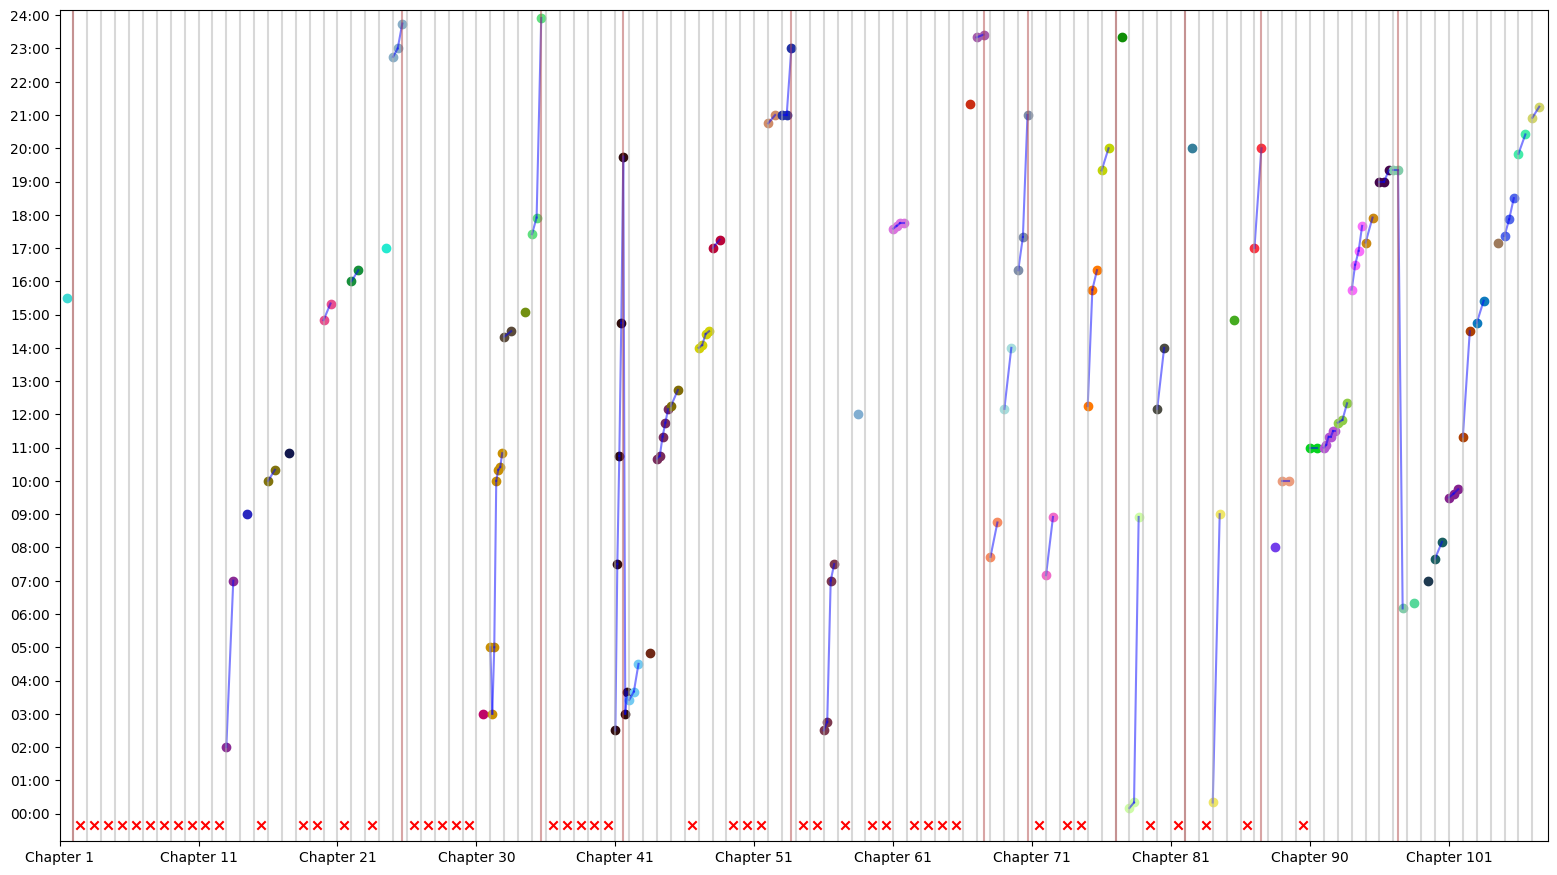

(None,
 11,
 [(1, 10.093457943925234),
  (31, 248.97196261682242),
  (41, 349.9065420560748),
  (41, 409.5060080106809),
  (56, 531.588785046729),
  (68, 671.214953271028),
  (72, 703.1775700934579),
  (78, 767.1028037383178),
  (84, 817.5700934579439),
  (88, 873.0841121495326),
  (97, 972.3364485981309)])

In [22]:
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from random import random

fig = plt.figure(figsize=(19.2,10.8))
ax = fig.add_subplot(111)

fig = plt.gcf()
size = fig.get_size_inches()*fig.dpi

unit = size[1].item()/len(timestamps)
halfUnit = unit/2

datechanges = []

previousTimestamp = 24*60
previousPosition = unit


for chapterNumber,chapter in enumerate(timestamps):

    xStart = unit*chapterNumber
    xEnd = xStart+unit
    color = (random(),random(),random())

    if len(chapter) == 0:
        # print(chapterNumber)
        plt.scatter(xStart+halfUnit,-20,marker='x',color='red')
    elif len(chapter) == 1:
        plt.scatter(xStart+halfUnit,chapter[0],color=color)
    else:
        interUnit = unit/len(chapter)
        for timestampNumer,timestamp in enumerate(chapter):
            plt.scatter(xStart+(interUnit*timestampNumer),timestamp,color=color)

            # Line between timestamps in a chapter with more than 1 tmestamp
            # Well first if last chapter, do not draw a line
            if timestampNumer+1 != len(chapter):
                xPoses = [xStart+(interUnit*timestampNumer),xStart+(interUnit*(timestampNumer+1))]
                yPoses = [timestamp,chapter[timestampNumer+1]]
                plt.plot(xPoses, yPoses, c=(0,0,1,0.5))
            
for chapterNumber,chapter in enumerate(timestamps):
    xStart = unit*chapterNumber
    xEnd = xStart+unit
    plt.axvline(xStart,color=(0.7,0.7,0.7,0.5))


for chapterNumber,chapter in enumerate(timestamps):
    xStart = unit*chapterNumber
    xEnd = xStart+unit

    # Because if the chapter does not chnage the time, it won't change the date
    if len(chapter) == 0:
        continue
    
    interUnit = unit/len(chapter)

    for timestampNumer,timestamp in enumerate(chapter):
        if previousTimestamp - timestamp > 120 and previousPosition != 0:
            datechanges.append((chapterNumber+1,previousPosition))
        previousTimestamp = timestamp
        previousPosition = xStart + (interUnit * timestampNumer)


for datechange in datechanges:
    plt.axvline(datechange[1],color=(0.7,0.3,0.3,0.5))
    pass


def minutes_to_hhmm(x,pos=0):
    hours = int(x // 60)
    minutes = int(x % 60)
    return f'{hours:02d}:{minutes:02d}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(minutes_to_hhmm))
ax.yaxis.set_major_locator(ticker.MultipleLocator(60))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'Chapter {int(x/unit)+1}'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(unit*10))

plt.ylim(-50,60*24+10)
plt.xlim(left=0,right=unit*len(timestamps)+(unit/10))      

plt.show(),len(datechanges),datechanges

### I have checked the above plot, and made this table

| Day number | Chapters |                                                                                                             Description |
| :--------- | :------: | ----------------------------------------------------------------------------------------------------------------------: |
| 1          |   1-12   |                                                                                                 arrival and orientation |
| 2          |  13-31   |                                                      it ends at the weapon inspection, has the null fight and library 1 |
| 3          |  31-35   |      food 1, grapple, aprentice, and jumping into the portal (note 35 does end exactly at midnight, which matches ch41) |
| 4          |  35-41   |          portal shenedigangs, bomb, etc (note ch41 has the whole, and is the only one thaat has timestamps for the day) |
| 5          |  41-55   |                                                                    emma returns, letter, assembly, library 2, library 3 |
| 6          |  56-67   |                                                                                                           movie night 1 |
| 7          |  68-71   |                                                                    Professor Vanavan's class, killing birds with Ilunor |
| 8          |  72-77   |                                                             Professor Articord's class, Assasination attempt at Thalmin |
| 9          |  78-84   |                                                      Larial Essen's / Sorecar's class, Mixer, Names of the burned books |
| 10         |  84-87   |                                                                                Professor Belnor's class, Dean Tea Party |
| 11         |  88-97   |      Professor Chiska's class, first library checkup, planing for the trip, the cosmos (and Post Scarcity) discussion I |
| 12         |   97-    | Trip to Elaseer, Buying a magic wand, Searching for Rila, Buying pens/buisness Plan, Adventurer's Guild, Meating Etholin|



## Analysis
Now that we have made **THE PLOT™** and **THE TABLE™**, we can go to the main course, the analysis of the chapter when the comunication deadline *(5 weeks)* ends.

We will use a few aproaches, but we will start with the simplest one ... just assume a constant speed, calculate the slope, and see where it crosses the 5 week line. 

In [23]:
fullDays = len(datechanges)-1 #it just works out this way, don't ask

firstDayOfset = 24*60 - timestamps[0][0] # this works out to 8 and a half hours

lastDayOfset = previousTimestamp # this is a bit harder, we do not know if the last chapter has a time .... but prevTimestamp has it, also conviniently this is in *"minutes after midnight"*

totalMinutesInBook = firstDayOfset+lastDayOfset+(fullDays*24*60)

# to check i asked wolframAlpha "15280 minutes = 10 days + 8.5 hours + 6 hours + 10 minutes" and it came out as "true"

decimalHoursInBook = totalMinutesInBook/60 # this is decimal hours
decimalDaysInBook = decimalHoursInBook/24 # this is decimal days

round(decimalDaysInBook,3),decimalHoursInBook,totalMinutesInBook

(11.24, 269.75, 16185)

In [24]:
dayInBook = len(datechanges)+1
hourInBook = previousTimestamp //60
minuteInBook = previousTimestamp % 60


currentTime = f"Day {dayInBook:.0f}, {hourInBook:02.0f}:{minuteInBook:02.0f}"

currentTime

'Day 12, 21:15'

In [32]:
# Well TIL that RoyalRoad only uses html, not MD

timeRemaining = round(((36*24*60)-(previousTimestamp+dayInBook*60*24))/(24*60),3)

day35Beginning = ((len(timestamps) + 1) * (35 * 24 * 60)) / totalMinutesInBook
day35T1530 = ((len(timestamps) + 1) * (((35 * 24 * 60) + (15 * 60) + 30))) / totalMinutesInBook  # 35 days + 15:30 (in minutes)
day35End = ((len(timestamps) + 1) * (((35 * 24 * 60) + (23 * 60) + 59))) / totalMinutesInBook  # End of 35th day (23:59)


out = "<p><strong>Welcome to the weekly </strong><i>(well not weekly, I got a diffrent monday schedule and got burned out a bit)<i/><strong> time analysis by <em>KekKom</em></strong></p>"


if len(timestamps[-1]) == 0:
    out += "This chapter either does not appear to have any timestamps, the estimates will not be updated"
    out += "It is equally probable that KekKom messsed up and the code AGAIN."
    out += ""
    out += f"The analysis below, will be using the data from: Chapter {next(i for i in reversed(range(len(timestamps))) if timestamps[i])+1}"
else:
    out += "This chapter has a timestamp, so the estimates will be updated"

out += f"""<p><strong>Current date: </strong><br>{currentTime}<br>It has been: <strong>{decimalHoursInBook}</strong> hours <em>({round(decimalDaysInBook,3)} days)</em>, since Emma's arrival<br /><strong>{timeRemaining}</strong> days remain until the ECS deadline (assuming the end of day 35 as the end-date)</p>
<p><strong>Plot of every timestamp in the book</strong></p>
<p><strong><img src="https://i.imgur.com/B5DgyYD.png" alt="" width="768" height="432" /></strong></p>
<p><strong>The deadline to get the ECS to work</strong><br>The deadline is 5 weeks after arrival, so there are three possibilities:</p>
<ul>
<li>If the deadline is at the beginning of day 35, then it would happen in chapter : {round(day35Beginning)}</li>
<li>If the deadline is exactly 35 days after (ie. 15:30 on day 35), then it would happen in chapter : {round(day35T1530)}</li>
<li>If the deadline is at the end of day 35, then it would happen in chapter : {round(day35End)}</li>
</ul>
<p><strong>The plot of how does this estimate change</strong></p>
<p>As you can see <strong><em>WPAtaMS</em></strong><em> </em>is accually getting <strong>slightly slower, but in general stabilising at current pace</strong></p>
<p><strong><img src="https://i.imgur.com/4iJJGzl.png" alt="" width="768" height="451" /></strong></p>
<p>&nbsp;</p>
<p><strong><em>Shameless left promotion</em></strong></p>
<p>This code is a result of a few weeks of work, if anyone here wants to improve the project the repo is <a href="https://github.com/KekKom/WPAtaMS-Analyzer" target="_blank" rel="noopener">here</a>. A star would make me a bit more happy for spending <strong>Insert TIME</strong> <em>(on and off) on this.</em></p>
"""

print(out)


<p><strong>Welcome to the weekly </strong><i>(well not weekly, I got a diffrent monday schedule and got burned out a bit)<i/><strong> time analysis by <em>KekKom</em></strong></p>This chapter has a timestamp, so the estimates will be updated<p><strong>Current date: </strong><br>Day 12, 21:15<br>It has been: <strong>269.75</strong> hours <em>(11.24 days)</em>, since Emma's arrival<br /><strong>23.115</strong> days remain until the ECS deadline (assuming the end of day 35 as the end-date)</p>
<p><strong>Plot of every timestamp in the book</strong></p>
<p><strong><img src="https://i.imgur.com/B5DgyYD.png" alt="" width="768" height="432" /></strong></p>
<p><strong>The deadline to get the ECS to work</strong><br>The deadline is 5 weeks after arrival, so there are three possibilities:</p>
<ul>
<li>If the deadline is at the beginning of day 35, then it would happen in chapter : 336</li>
<li>If the deadline is exactly 35 days after (ie. 15:30 on day 35), then it would happen in chapter : 343</